# Exercícios Análise de Regressão

-----

## Heterocedasticidade e Linearização

-----

### 1 - Identificando Heterocedasticidade




In [67]:
# Importe as bibliotecas necessárias
import numpy as np
import statsmodels.api as sm
import matplotlib.pyplot as plt
import pandas as pd

#### I. Criar um conjunto de dados hipotético com uma variável independente (X) 

In [68]:
# Criando um conjunto de dados Fake
np.random.seed(11102023)
X = np.random.rand(100) * 10
X = [x for x in X] # Converte em uma lista simples


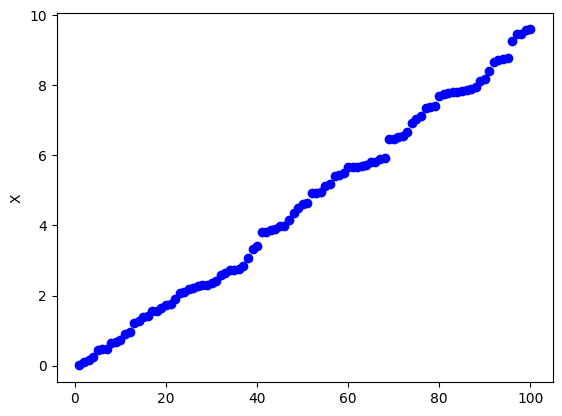

In [69]:
plt.scatter(range(1, len(sorted(X)) + 1), sorted(X), c='blue', marker='o', label='Dados')
plt.ylabel('X')
plt.show()

#### II. Use X para criar uma série exponencial de Y (Y = aebX)

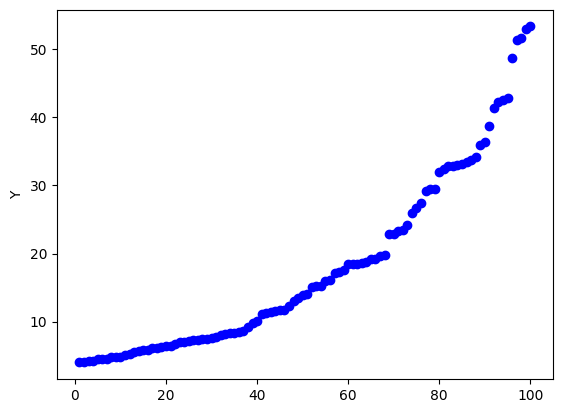

In [70]:
a = 4
b = 0.27
Y = a * np.exp(b * np.array(X))
Y = [y for y in Y] # Converte em uma lista simples
plt.scatter(range(1, len(sorted(Y)) + 1), sorted(Y), c='blue', marker='o', label='Dados')
plt.ylabel('Y')
plt.show()

#### III. Ajuste um modelo de regressão linear para prever Y com base em X.	

In [71]:
data = {"X":X,"Y":Y}
df = pd.DataFrame(data)
target = df.Y
features = df.drop("Y", axis=1)
features = sm.add_constant(features)

model = sm.OLS(target, features).fit()
print(model.summary())

                            OLS Regression Results                            
Dep. Variable:                      Y   R-squared:                       0.900
Model:                            OLS   Adj. R-squared:                  0.899
Method:                 Least Squares   F-statistic:                     882.7
Date:                Thu, 19 Oct 2023   Prob (F-statistic):           8.18e-51
Time:                        19:37:33   Log-Likelihood:                -285.51
No. Observations:                 100   AIC:                             575.0
Df Residuals:                      98   BIC:                             580.2
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const         -2.6918      0.821     -3.280      0.0

#### IV. Plote o gráfico de dispersão dos resíduos do modelo (resíduos vs. valores ajustados).

Text(0.5, 1.0, 'Gráfico de Dispersão dos Resíduos')

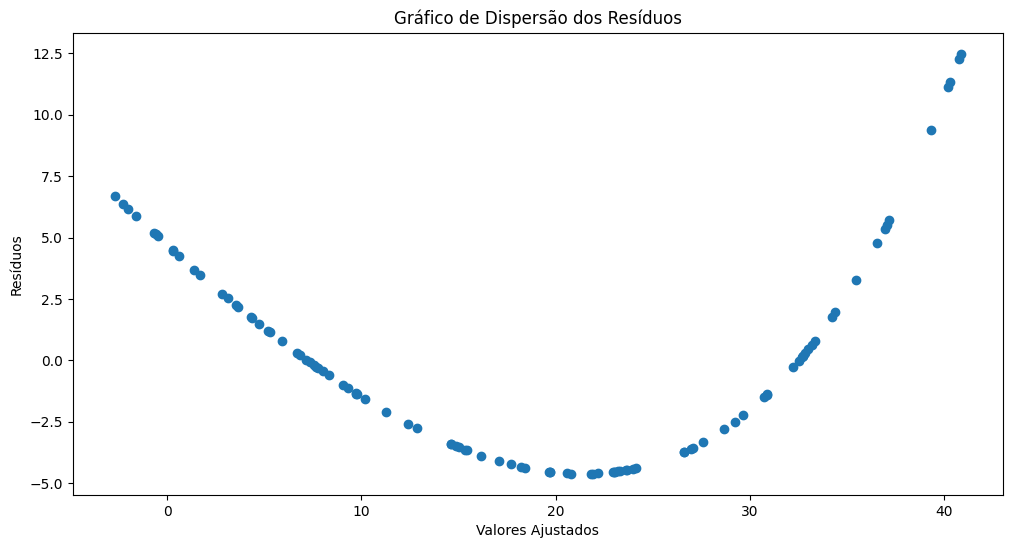

In [72]:
plt.figure(figsize=(12, 6))
plt.scatter(model.fittedvalues, model.resid)
plt.xlabel("Valores Ajustados")
plt.ylabel("Resíduos")
plt.title("Gráfico de Dispersão dos Resíduos")


#### V. Visualize os resíduos em relação a X. Observe qualquer padrão nas variações dos resíduos. Isso sugere a presença de heterocedasticidade?



Os resíduos parecem não ser constantes ao longo dos valores ajustados, eles tendem a aumentar a medida que X aumenta, isso indica uma heterocedasticidade.

-----

### 2 - Teste de Breusch-Pagan

#### I - Usando o mesmo conjunto de dados do Exercício 1, execute o teste de Breusch-Pagan para verificar a heterocedasticidade.

In [73]:
from statsmodels.compat import lzip
from statsmodels.stats.diagnostic import het_breuschpagan

bp_test = het_breuschpagan(model.resid, features)
labels = ['LM Statistic', 'LM-Test p-value', 'F-Statistic', 'F-Test p-value']
print(lzip(labels, bp_test))

[('LM Statistic', 11.238569724655568), ('LM-Test p-value', 0.0008011486965328548), ('F-Statistic', 12.408315521727008), ('F-Test p-value', 0.0006508882708305236)]


#### II - Interprete os resultados do teste. Se o teste indicar a presença de heterocedasticidade, o que isso significa?


O valor de (F-Test p-value) é muito pequeno, então rejeito a hipótese nula de que todos os Betas são iguais a zero, logo a hipótese alternativa é de que algum beta da variância seja zero, logo encontramos a HETEROCEDASTICIDADE

-----

### 3 - Transformações de Dados


#### I - Aplique uma transformação apropriada (por exemplo, logarítmica) aos dados de Y e ajuste o modelo de regressão linear transformado.

In [74]:
target_h = np.log(df.Y)
features_h = df.drop("Y", axis=1)
features_h = sm.add_constant(features_h)

model_h = sm.OLS(target_h, features_h).fit()
print(model_h.summary())

                            OLS Regression Results                            
Dep. Variable:                      Y   R-squared:                       1.000
Model:                            OLS   Adj. R-squared:                  1.000
Method:                 Least Squares   F-statistic:                 9.402e+31
Date:                Thu, 19 Oct 2023   Prob (F-statistic):               0.00
Time:                        19:37:34   Log-Likelihood:                 3338.6
No. Observations:                 100   AIC:                            -6673.
Df Residuals:                      98   BIC:                            -6668.
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const          1.3863    1.5e-16   9.27e+15      0.0

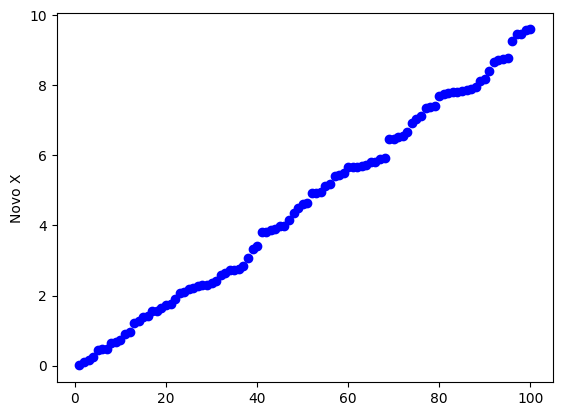

In [75]:
plt.scatter(range(1, len(sorted(features_h['X'])) + 1), sorted(features_h['X']), c='blue', marker='o', label='Dados')
plt.ylabel('Novo X')
plt.show()

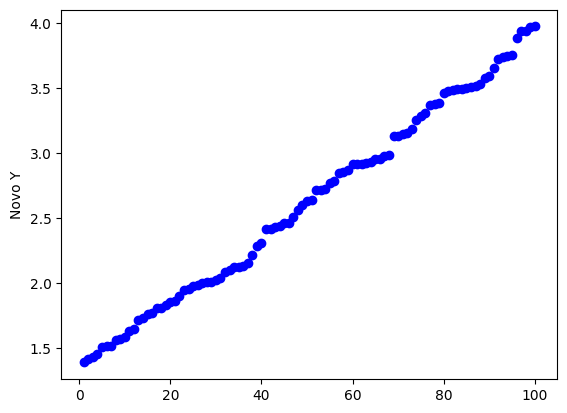

In [76]:
plt.scatter(range(1, len(sorted(target_h)) + 1), sorted(target_h), c='blue', marker='o', label='Dados')
plt.ylabel('Novo Y')
plt.show()

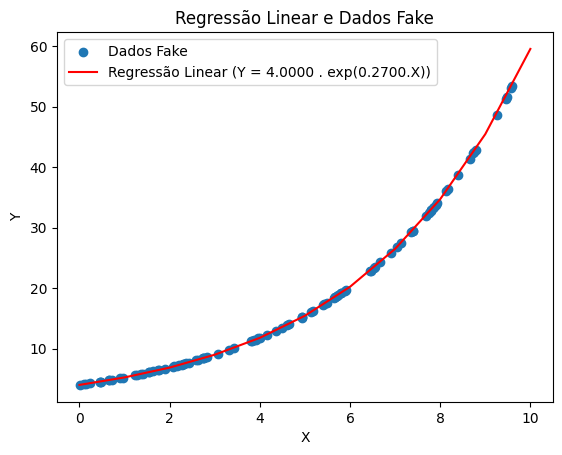

In [77]:

# Valores estimados da função gerada
# ln(Y_est) = model_h.params['const'] + model_h.params['X'] * np.array(features_h['X'])
Y_est = np.exp(model_h.params['const']) * np.exp(model_h.params['X'] * np.arange(11))
const = np.exp(model_h.params['const'])
x = model_h.params['X']
# Plotagem dos dados e da função gerada
plt.scatter(X, Y, label='Dados Fake')
plt.plot(np.arange(11), Y_est, color='red',label=f'Regressão Linear (Y = {const:.4f} . exp({x:.4f}.X))')
plt.xlabel('X')
plt.ylabel('Y')
plt.legend()
plt.title('Regressão Linear e Dados Fake')
plt.show()

#### II - Plote novamente o gráfico de dispersão dos resíduos e execute o teste de Breusch-Pagan para os resíduos transformados.

0    -8.881784e-16
1    -4.440892e-16
2    -4.440892e-16
3    -8.881784e-16
4    -4.440892e-16
          ...     
95   -4.440892e-16
96   -1.332268e-15
97   -4.440892e-16
98   -8.881784e-16
99   -8.881784e-16
Length: 100, dtype: float64


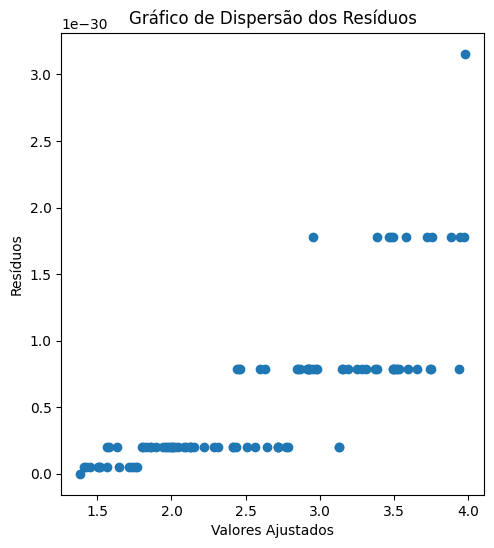

In [80]:
plt.figure(figsize=(12, 6))
plt.subplot(1, 2, 1)
plt.scatter(target_h, model_h.resid**2)
plt.xlabel("Valores Ajustados")
plt.ylabel("Resíduos")
plt.title("Gráfico de Dispersão dos Resíduos")
print(model_h.resid)

In [81]:
bp_test = het_breuschpagan(model_h.resid, features_h)
labels = ['LM Statistic', 'LM-Test p-value', 'F-Statistic', 'F-Test p-value']
print(lzip(labels, bp_test))

[('LM Statistic', 61.28056906131598), ('LM-Test p-value', 4.949409651487575e-15), ('F-Statistic', 155.10289336429688), ('F-Test p-value', 6.567107903560999e-22)]


#### III - Compare os resultados com o Exercício 1. A transformação dos dados aliviou a heterocedasticidade?


Temos um problema aqui, o gráfico de resíduos está com a escala em exp(-30), muito pequena. Isso se dá porque a regressão conseguiu encontrar perfeitamente a função original. Já que X gerou Y no princípio.

Com isso o Teste de Breusch-Pagan também retornou um valor pequeno demais. Porém é um cenário errado